In [10]:
import numpy as np
from math import exp, log
import matplotlib.pyplot as plt

Log Likelihood at iteration 0: -970.4060527838883
Log Likelihood at iteration 1: -359.1743249334887
Log Likelihood at iteration 2: -230.26302289271584
Log Likelihood at iteration 3: -176.00589412997087
Log Likelihood at iteration 4: -154.5882866302609
Log Likelihood at iteration 5: -148.27383805082928
Log Likelihood at iteration 6: -147.36345738817062
Log Likelihood at iteration 7: -147.3357334752881
Log Likelihood at iteration 8: -147.3356997796502
Log Likelihood at iteration 9: -147.33569977959525


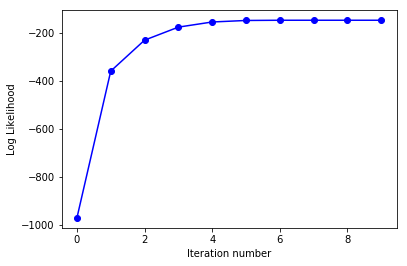


Weight Matrix:
[[-1.57382735 -1.48851724 -2.24676063 -0.97299764 -1.8894647  -0.48977501
   0.88489007  2.06110873]
 [ 1.07332845 -0.06623494  1.03466118 -0.67031334 -0.15310989  0.64146356
  -1.59249615  0.03143302]
 [ 2.96985915  1.30120163  1.0107918   0.34100829  0.25683116 -2.28764686
  -3.30166042 -3.88545228]
 [ 2.45742257  0.75477804  1.81450035 -0.58730787 -1.76782103 -0.55973792
   0.47931207 -0.30565182]
 [ 0.17995796  0.22623992  0.28440877 -1.04130173 -0.07994932 -0.06781282
  -0.79794465 -0.14243648]
 [ 1.36851098 -0.98698974  0.49606935  0.81489463  0.40076174 -0.81301073
   0.01353448 -1.92933827]
 [ 0.62676734 -0.36316349  1.19820869  0.92584326 -0.14690891 -0.18828491
   0.62775884 -1.77306152]
 [ 0.41111955  0.37792257 -0.97712224  5.58457667  0.3413834   0.42844534
   0.02970822 -0.66521606]]


In [14]:
def parseData(fname):
    f = open(fname)
    for line in f.readlines():
        yield [float(d) for d in line.rstrip().split()]
    
X3 = [d for d in parseData("hw5_train3.txt")]
y3 = [0 for d in parseData("hw5_train3.txt")]

X5 = [d for d in parseData("hw5_train5.txt")]
y5 = [1 for d in parseData("hw5_train5.txt")]

X = X3 + X5
y = y3 + y5

def sigmoid(x):
    return 1.0 / (1 + exp(-x))

def loglikelihood(w_vec, X, y):
    ll = 0
    for i in range(len(X)):
        dotp = np.dot(w_vec, X[i])
        log_sig = log(sigmoid(dotp))
        log_neg_sig = log(sigmoid(-1*dotp))
        ll += y[i] * log_sig + (1 - y[i]) * log_neg_sig
    return ll

def fprime(w_vec, X, y):
    dl = [0] * len(w_vec)
    for i in range(len(X)):
        sig = sigmoid(np.dot(w_vec, X[i]))
        for j in range(len(w_vec)):
            dl[j] += (y[i] - sigmoid(np.dot(w_vec, X[i])))*X[i][j]
            
    return dl
    
    
def fprimeprime(w_vec, X):
    hess = [[0 for d2 in w_vec] for d in w_vec]
    for i in range(len(X)):
        dotp = np.dot(w_vec, X[i])
        sigsquare = sigmoid(dotp)**2
        for j in range(len(w_vec)):
            for k in range(len(w_vec)):
                hess[j][k] -= (sigsquare * exp(-1 * dotp) * 
                               X[i][j] * X[i][k])
    
    return hess

def newtonsmethod(X, y):
    likelihood_arr = []
    w_vec = [0] * len(X[0])
    fp = np.array(fprime(w_vec, X, y))
    fpp = np.array(fprimeprime(w_vec, X))
    prevll = 0
    curll = loglikelihood(w_vec, X, y)
    iters = 0
    while abs(prevll - curll) > 0.0000001:
        print("Log Likelihood at iteration {}: {}".format(iters, curll))
        likelihood_arr.append(curll)
        delt = np.dot(np.linalg.inv(fpp), fp)
        w_vec = [w_vec[i] - delt[i] for i in range(int(len(w_vec)))]
        fp = np.array(fprime(w_vec, X, y))
        fpp = np.array(fprimeprime(w_vec, X))
        prevll = curll
        curll = loglikelihood(w_vec, X, y)
        iters += 1

    print("Log Likelihood at iteration {}: {}".format(iters, curll))
    likelihood_arr.append(curll)
    plt.plot([i for i in range(len(likelihood_arr))], 
             likelihood_arr, 'bo', linestyle='-')
    plt.xlabel("Iteration number")
    plt.ylabel("Log Likelihood")
    plt.show()
    return w_vec
                   
    
w = newtonsmethod(X,y)
print("\nWeight Matrix:")
print(np.reshape(w, (8, 8)))

X3_test = [d for d in parseData("hw5_test3.txt")]
y3_test = [0 for d in parseData("hw5_test3.txt")]

X5_test = [d for d in parseData("hw5_test5.txt")]
y5_test = [1 for d in parseData("hw5_test5.txt")]

X_test = X3_test + X5_test
y_test = y3_test + y5_test


In [12]:
def accuracy(w_vec, X, y):
    predictions = [sigmoid(np.dot(x,w_vec)) > 0.5 for x in X]
    incorrect = [(a!=b) for (a,b) in zip(predictions,y)]
    err = sum(incorrect) * 1.0 / len(incorrect)
    return err

print("Error rate on training set: {}".format(accuracy(w, X, y)))
print("Error rate on test set: {}".format(accuracy(w, X_test, y_test)))

Error rate on training set: 0.03571428571428571
Error rate on test set: 0.0525
